## research for rq3

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


Weekdays Aggregation (by hour):
    hour  taxi_demand  avg_journey_time_sec  avg_journey_time_min
0      0        39300            981.884987             16.364750
1      1        23758            932.196692             15.536612
2      2        15894            910.930414             15.182174
3      3        12508            946.379437             15.772991
4      4        15449           1052.557900             17.542632
5      5        23332           1089.650651             18.160844
6      6        39622           1173.298672             19.554978
7      7        60972           1213.101424             20.218357
8      8        75056           1196.872975             19.947883
9      9        67804           1177.281458             19.621358
10    10        58376           1206.622413             20.110374
11    11        55718           1243.527316             20.725455
12    12        56215           1242.910166             20.715169
13    13        58416           1283.955269 

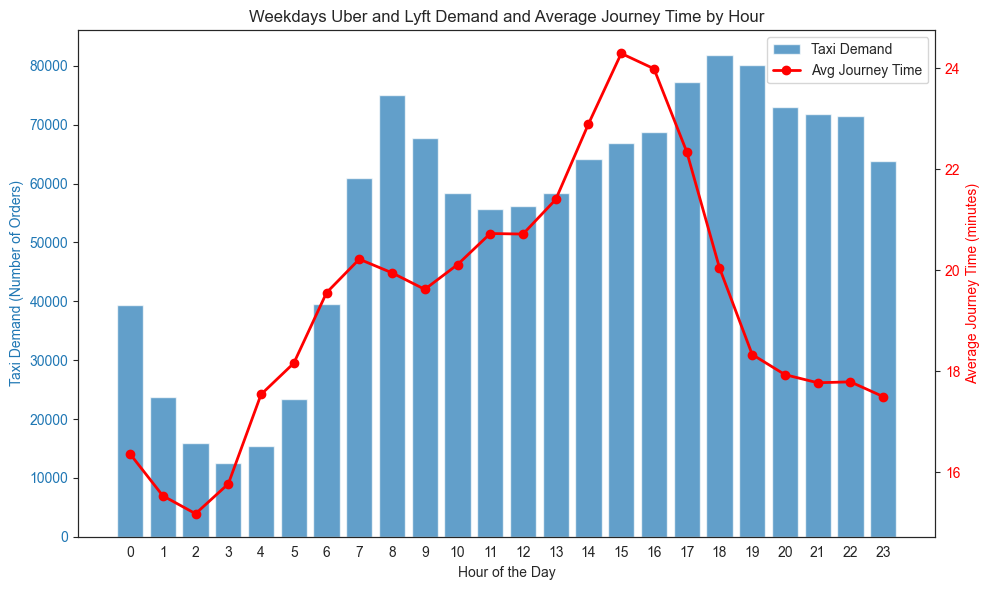

Weekends Aggregation (by hour):
    hour  taxi_demand  avg_journey_time_sec  avg_journey_time_min
0      0        34556           1022.632278             17.043871
1      1        28444            965.590564             16.093176
2      2        22057            953.376343             15.889606
3      3        17031            955.801362             15.930023
4      4        13012            995.818706             16.596978
5      5         9857           1027.420006             17.123667
6      6        10952           1038.155588             17.302593
7      7        13173           1013.838382             16.897306
8      8        15815           1013.557951             16.892633
9      9        19922           1010.400813             16.840014
10    10        23614           1044.065131             17.401086
11    11        25796           1107.368119             18.456135
12    12        26979           1157.858149             19.297636
13    13        28191           1200.105530 

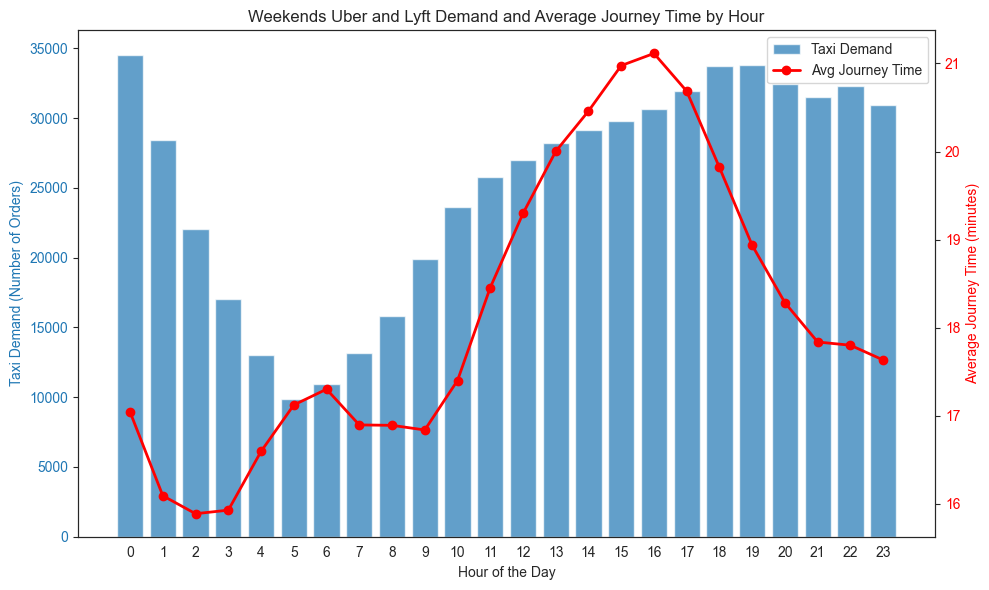

In [6]:

# 设置绘图风格
sns.set_style("white")

# ------------------------------
# 1. Read the processed data
# ------------------------------
file_name = "2022_processed_all.csv"
# Parse datetime columns as necessary
df = pd.read_csv(file_name, parse_dates=['pickup_datetime', 'dropoff_datetime'])

# ------------------------------
# 2. Data Cleaning and Feature Extraction
# ------------------------------
# Ensure trip_time is numeric (assumed to be in seconds)
df['trip_time'] = pd.to_numeric(df['trip_time'], errors='coerce')
# Filter out rows with non-positive trip_time
df = df[df['trip_time'] > 0]

# Create new columns: hour of day and weekday (Monday=0, Sunday=6)
df['hour'] = df['pickup_datetime'].dt.hour
df['weekday'] = df['pickup_datetime'].dt.weekday

# ------------------------------
# 3. Weekdays Analysis
# ------------------------------
# Filter data for weekdays (Monday=0 to Friday=4)
weekdays_df = df[df['weekday'] < 5]

# Group by hour: calculate taxi demand (order count) and average journey time
weekdays_group = weekdays_df.groupby('hour').agg(
    taxi_demand=('pickup_datetime', 'count'),
    avg_journey_time_sec=('trip_time', 'mean')
).reset_index()
# Convert average journey time to minutes
weekdays_group['avg_journey_time_min'] = weekdays_group['avg_journey_time_sec'] / 60.0

print("Weekdays Aggregation (by hour):")
print(weekdays_group)

# Plot Weekdays: Taxi Demand and Average Journey Time by Hour
fig, ax1 = plt.subplots(figsize=(10, 6))

# Bar chart for taxi demand
ax1.bar(weekdays_group['hour'], weekdays_group['taxi_demand'], color='tab:blue', alpha=0.7, label='Taxi Demand')
ax1.set_xlabel('Hour of the Day')
ax1.set_ylabel('Taxi Demand (Number of Orders)', color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')
ax1.set_xticks(np.arange(0, 24, 1))
ax1.set_title('Weekdays Uber and Lyft Demand and Average Journey Time by Hour')

# Line plot for average journey time on the twin y-axis
ax2 = ax1.twinx()
ax2.plot(weekdays_group['hour'], weekdays_group['avg_journey_time_min'], color='red', marker='o', linewidth=2, label='Avg Journey Time')
ax2.set_ylabel('Average Journey Time (minutes)', color='red')
ax2.tick_params(axis='y', labelcolor='red')

fig.legend(loc='upper right', bbox_to_anchor=(1,1), bbox_transform=ax1.transAxes)
plt.tight_layout()
plt.show()

# ------------------------------
# 4. Weekends Analysis
# ------------------------------
# Filter data for weekends (Saturday=5, Sunday=6)
weekends_df = df[df['weekday'] >= 5]

# Group by hour: calculate taxi demand and average journey time
weekends_group = weekends_df.groupby('hour').agg(
    taxi_demand=('pickup_datetime', 'count'),
    avg_journey_time_sec=('trip_time', 'mean')
).reset_index()
weekends_group['avg_journey_time_min'] = weekends_group['avg_journey_time_sec'] / 60.0

print("Weekends Aggregation (by hour):")
print(weekends_group)

# Plot Weekends: Taxi Demand and Average Journey Time by Hour
fig, ax1 = plt.subplots(figsize=(10, 6))

ax1.bar(weekends_group['hour'], weekends_group['taxi_demand'], color='tab:blue', alpha=0.7, label='Taxi Demand')
ax1.set_xlabel('Hour of the Day')
ax1.set_ylabel('Taxi Demand (Number of Orders)', color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')
ax1.set_xticks(np.arange(0, 24, 1))
ax1.set_title('Weekends Uber and Lyft Demand and Average Journey Time by Hour')

ax2 = ax1.twinx()
ax2.plot(weekends_group['hour'], weekends_group['avg_journey_time_min'], color='red', marker='o', linewidth=2, label='Avg Journey Time')
ax2.set_ylabel('Average Journey Time (minutes)', color='red')
ax2.tick_params(axis='y', labelcolor='red')

fig.legend(loc='upper right', bbox_to_anchor=(1,1), bbox_transform=ax1.transAxes)
plt.tight_layout()
plt.show()


Uber Data Preview:
  hvfhs_license_num dispatching_base_num originating_base_num  \
0            HV0003               B03404               B03404   
1            HV0003               B03404               B03404   
2            HV0005               B03406                  NaN   
3            HV0003               B03404               B03404   
4            HV0005               B03406                  NaN   

      request_datetime    on_scene_datetime     pickup_datetime  \
0  2022-01-23 17:11:03  2022-01-23 17:12:56 2022-01-23 17:14:56   
1  2022-01-07 23:13:02  2022-01-07 23:15:30 2022-01-07 23:17:30   
2  2022-01-18 08:19:22                  NaN 2022-01-18 08:28:15   
3  2022-01-28 01:09:54  2022-01-28 01:11:53 2022-01-28 01:13:53   
4  2022-01-31 23:25:31                  NaN 2022-01-31 23:29:24   

     dropoff_datetime  PULocationID  DOLocationID  trip_miles  trip_time  \
0 2022-01-23 17:25:49           248            20       3.340        653   
1 2022-01-07 23:53:36           261

C:\Users\New\AppData\Local\Temp\ipykernel_38348\1727002677.py:51: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=borough_group, x="Borough", y="order_count", palette="viridis")


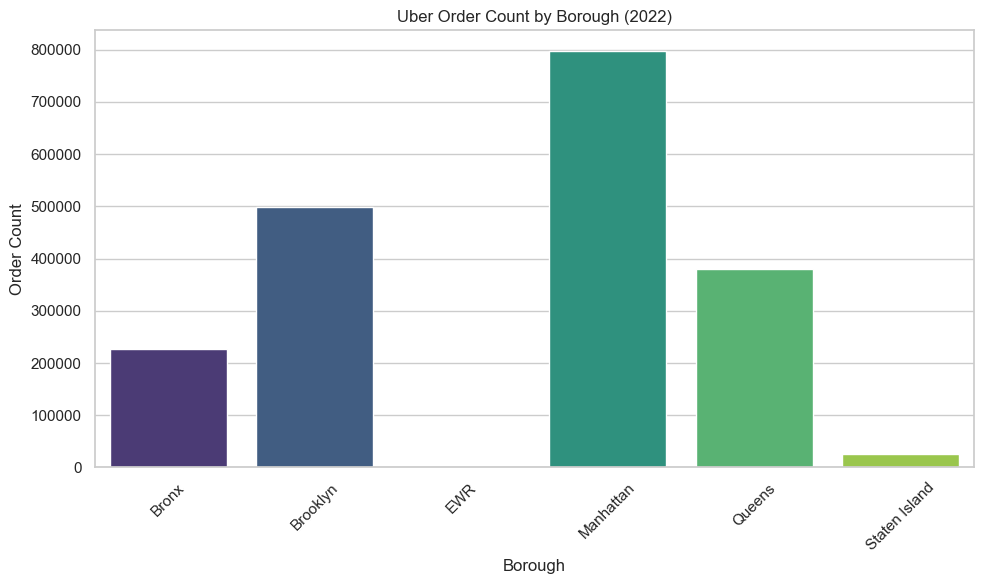

In [ ]:
sns.set_style("white")
pd.set_option('display.max_columns', None)

# ------------------------------
# 1. 读取数据
# ------------------------------
# 读取处理后的 Uber 数据（2022_processed_all.csv），并解析时间列
uber_df = pd.read_csv("2022_processed_all.csv", parse_dates=['pickup_datetime', 'dropoff_datetime'])
print("Uber Data Preview:")
print(uber_df.head())

# 读取 Taxi Zone Lookup 表
zone_lookup = pd.read_csv("taxi_zone_lookup.csv")
print("\nTaxi Zone Lookup Preview:")
print(zone_lookup.head())

# ------------------------------
# 2. 数据关联：将 Uber 数据与区域对照表合并
# ------------------------------
# 关联条件：Uber 数据中的 PULocationID 与 taxi_zone_lookup 中的 LocationID 对应
# 注意：保证两边的数据类型一致，如果必要可进行转换
uber_df['PULocationID'] = pd.to_numeric(uber_df['PULocationID'], errors='coerce')
zone_lookup['LocationID'] = pd.to_numeric(zone_lookup['LocationID'], errors='coerce')

# 以 left join 关联，保留 Uber 所有记录，加入 Borough、Zone 及 service_zone 信息
uber_df = uber_df.merge(zone_lookup, left_on='PULocationID', right_on='LocationID', how='left')

# 查看合并后部分数据，确保 Borough、Zone 等已正确添加
print("\nUber Data with Region Information Preview:")
print(uber_df[['pickup_datetime', 'PULocationID', 'Borough', 'Zone']].head(10))

# ------------------------------
# 3. 按 Region 进行分组统计
# ------------------------------

borough_group = uber_df.groupby("Borough").size().reset_index(name="order_count")
# 按照 Borough 字母顺序排序，而不是按照订单数
borough_group = borough_group.sort_values(by="Borough", ascending=True)
print(borough_group)

# # 方式 2：按 Borough 和 Zone 分组统计（细分区域）
# region_zone_group = uber_df.groupby(["Borough", "Zone"]).size().reset_index(name="order_count")
# region_zone_group = region_zone_group.sort_values(by="order_count", ascending=False)
# print("\nOrders grouped by Borough and Zone:")
# print(region_zone_group)

# ------------------------------
# 4. 绘图展示各区域订单数（Borough）
# ------------------------------
plt.figure(figsize=(10,6))
sns.barplot(data=borough_group, x="Borough", y="order_count", palette="viridis")
plt.title("Uber Order Count by Borough (2022)")
plt.xlabel("Borough")
plt.ylabel("Order Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# # 如果想细分展示每个 Borough 内不同 Zone 的情况，可以绘制分面图或堆叠条形图
# # 此处给出简单的堆积条形图示例
# # Pivot 表：行索引 Borough，列为 Zone，值为 order_count
# pivot_table = region_zone_group.pivot(index="Borough", columns="Zone", values="order_count").fillna(0)
# pivot_table = pivot_table.sort_index()

# # 绘制堆积条形图
# pivot_table.plot(kind="bar", stacked=True, figsize=(12,8))
# plt.title("Uber Order Count by Borough and Zone (2022)")
# plt.xlabel("Borough")
# plt.ylabel("Order Count")
# plt.xticks(rotation=45)
# plt.tight_layout()
# plt.show()


C:\Users\New\AppData\Local\Temp\ipykernel_36624\777996071.py:45: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_taxi["Borough"].fillna("Unknown", inplace=True)
C:\Users\New\AppData\Local\Temp\ipykernel_36624\777996071.py:46: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For examp

Comparison by Borough:
         Borough  order_count_taxi  order_count_uber
0          Bronx               711            225877
1       Brooklyn              3935            498569
2            EWR                87                 1
3      Manhattan            326614            797204
4         Queens             33468            380459
5  Staten Island                18             25228
6        Unknown              5134                79


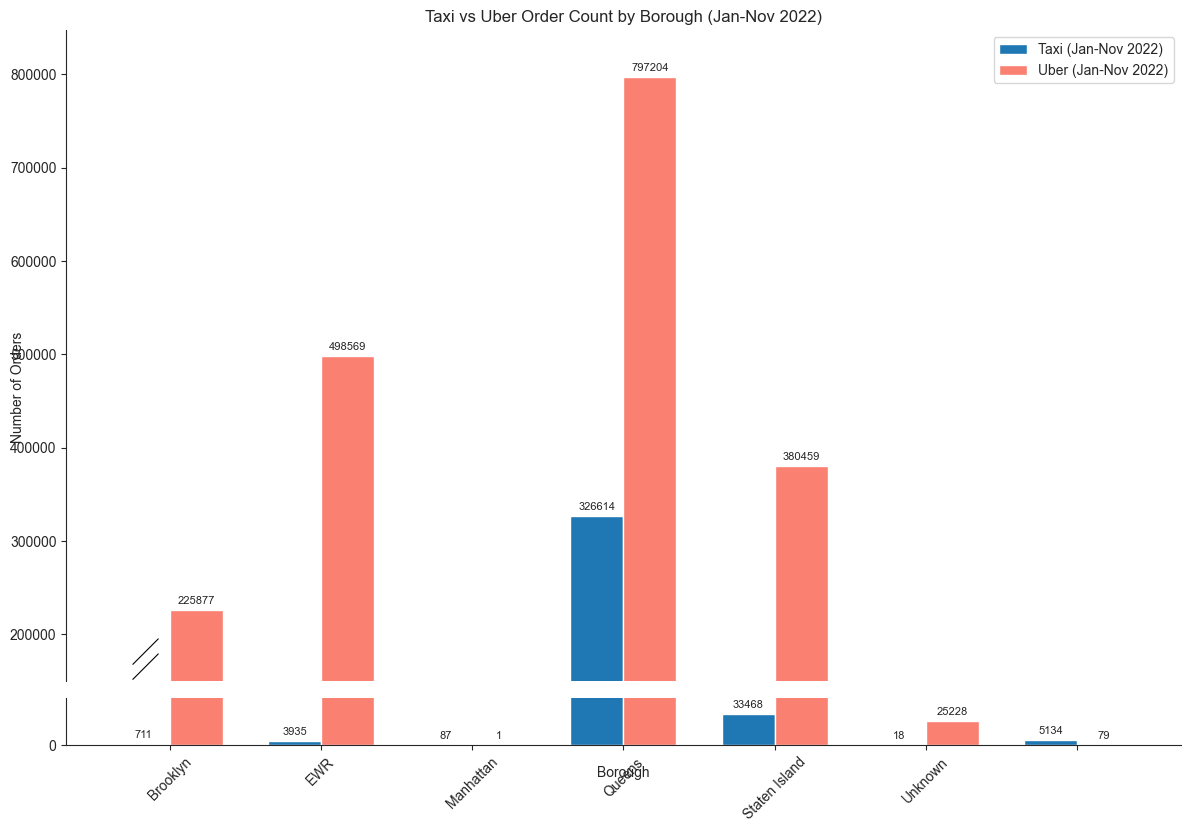

In [ ]:
import os
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from brokenaxes import brokenaxes

# ------------------------------
# 1. Set up file paths
# ------------------------------
# Taxi data (2022, Jan-Nov), assumed to be located in folder "rq1"
taxi_file = "../rq1/combined_data/2022_sampled_cleaned.csv"
# Uber data (2022, Jan-Nov), assumed to be in the current folder
uber_file = "2022_processed_all.csv"
# Taxi zone lookup table
zone_lookup_file = "taxi_zone_lookup.csv"

# ---- 2.1 Read Taxi data ----
df_taxi = pd.read_csv(taxi_file, parse_dates=["pickup_datetime", "dropoff_datetime"])
# Filter to keep only records with pickup month <= 11 and year == 2022
df_taxi = df_taxi[(df_taxi["pickup_datetime"].dt.year == 2022) & 
                  (df_taxi["pickup_datetime"].dt.month <= 11)]

# ---- 2.2 Read Uber data ----
df_uber = pd.read_csv(uber_file, parse_dates=["pickup_datetime", "dropoff_datetime"])
# Filter for 2022, Jan-Nov:
df_uber = df_uber[(df_uber["pickup_datetime"].dt.year == 2022) & 
                  (df_uber["pickup_datetime"].dt.month <= 11)]

# ---- 2.3 Read Taxi Zone Lookup ----
zone_lookup = pd.read_csv(zone_lookup_file)

# Convert PULocationID (from taxi and uber) and LocationID (from lookup) to numeric if needed
df_taxi["PULocationID"] = pd.to_numeric(df_taxi["PULocationID"], errors="coerce")
df_uber["PULocationID"] = pd.to_numeric(df_uber["PULocationID"], errors="coerce")
zone_lookup["LocationID"] = pd.to_numeric(zone_lookup["LocationID"], errors="coerce")

# ---- 2.4 Merge to get Borough info ----
# 关联条件：Taxi/Uber data "PULocationID" to zone_lookup "LocationID"
df_taxi = df_taxi.merge(zone_lookup, left_on="PULocationID", right_on="LocationID", how="left")
df_uber = df_uber.merge(zone_lookup, left_on="PULocationID", right_on="LocationID", how="left")

# Fill missing Borough with "Unknown"
df_taxi["Borough"].fillna("Unknown", inplace=True)
df_uber["Borough"].fillna("Unknown", inplace=True)

# ------------------------------
# 3. Group by Borough and compute order counts
# ------------------------------

# Compute Taxi orders per Borough
taxi_group = df_taxi.groupby("Borough").size().reset_index(name="order_count_taxi")
# Compute Uber orders per Borough
uber_group = df_uber.groupby("Borough").size().reset_index(name="order_count_uber")

# Merge the two results by Borough (outer join to retain all regions)
df_compare = pd.merge(taxi_group, uber_group, on="Borough", how="outer").fillna(0)
# Ensure order_count columns are integers
df_compare["order_count_taxi"] = df_compare["order_count_taxi"].astype(int)
df_compare["order_count_uber"] = df_compare["order_count_uber"].astype(int)

# Sort by Borough alphabetically (ascending)
df_compare = df_compare.sort_values(by="Borough").reset_index(drop=True)
print("Comparison by Borough:")
print(df_compare)

# ------------------------------
# 4. Plot using brokenaxes with a broken y-axis
# ------------------------------

# 4.1 Determine y-axis limits for broken axis:
# 这里假设某些 Borough 的订单数可能极高，需要断轴
y_max = max(df_compare["order_count_taxi"].max(), df_compare["order_count_uber"].max())

# 根据数据情况调整断轴区间，示例中将第一段设定为 0 ~ threshold1，
# 第二段从 threshold2 到 (y_max + margin)
# 请根据实际 df_compare 中的数值修改以下参数
threshold1 = 50000
threshold2 = 150000
margin = 50000
y2_max = y_max + margin

# ...（前面代码保持不变）...

# 4.2 准备 x 坐标和 bar 宽度
boroughs = df_compare["Borough"].tolist()
x = np.arange(len(boroughs))
width = 0.35

# 4.3 使用 brokenaxes 创建图形
fig = plt.figure(figsize=(12, 8))
bax = brokenaxes(
    ylims=((0, threshold1), (threshold2, y2_max)),
    hspace=0.05
)

# 4.4 绘制 Taxi 数据，使用蓝色 "tab:blue"
bax.bar(x - width/2, df_compare["order_count_taxi"], width=width,
        label="Taxi (Jan-Nov 2022)", color="tab:blue")

# 4.5 绘制 Uber 数据，使用橙色 "tab:orange"
bax.bar(x + width/2, df_compare["order_count_uber"], width=width,
        label="Uber (Jan-Nov 2022)", color="tab:orange")

# 4.6 对每个子坐标轴都设置 x 轴刻度和标签
for ax in bax.axs:
    ax.set_xticks(x)
    ax.set_xticklabels(boroughs, rotation=45)

# 设置 x、y 标签和标题
bax.set_xlabel("Borough")
bax.set_ylabel("Number of Orders")
bax.set_title("Taxi vs Uber Order Count by Borough (Jan-Nov 2022)")
bax.legend()

# 在每个柱子顶部加注具体数值
for ax in bax.axs:
    for bar in ax.patches:
        height = bar.get_height()
        ax.annotate(f'{int(height)}',
                    xy=(bar.get_x() + bar.get_width()/2, height),
                    xytext=(0, 3),  # 向上偏移 3 个像素
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.show()

